I try to learn how to explore NLP to build a small search engine based on the chatbot conversation. If you have any advice to improve it, please comment below. Thank you and have a nice reading!

In [2]:
!unzip "/content/drive/MyDrive/Mental Health Chatboat/archive.zip" -d "/content/drive/MyDrive/Mental Health Chatboat/"

Archive:  /content/drive/MyDrive/Mental Health Chatboat/archive.zip
  inflating: /content/drive/MyDrive/Mental Health Chatboat/Mental_Health_FAQ.csv  


In [45]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from string import punctuation
import re

In [46]:
faq =pd.read_csv('/content/drive/MyDrive/Mental Health Chatboat/Mental_Health_FAQ.csv')
faq

,Question_ID,Questions,Answers
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi..."
...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c..."
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...


In [47]:
faq_quest = faq[['Question_ID', 'Questions']]
faq_answ = faq[['Question_ID', 'Answers']]

## Text Pre-processing

In [62]:
def to_lower(text):
    return text.lower()

In [63]:
contractions_dict = {     
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would have",
"I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "iit will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had", "that'd've": "that would have",
"that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they had",
"they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have",
"we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
"why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def expand_contraction(text, contraction_dict):
    contraction_pattern= re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)
    
    def expand_match(contraction):
        match= contraction.group(0)
        first_char= match[0]
        expanded_contraction= contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction
        
    expanded_text= contraction_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contraction(text, contractions_dict)
    return text

In [64]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [65]:
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [66]:
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

In [67]:
def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

In [68]:
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [71]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
    stop_words= stopwords.words('english')
    
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [73]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [74]:
faq_quest['prep1']= faq_quest['Questions'].apply(to_lower)
faq_quest['prep2']= faq_quest['prep1'].apply(main_contraction)
faq_quest['prep3']= faq_quest['prep2'].apply(remove_number)
faq_quest['prep4']= faq_quest['prep3'].apply(remove_punct)
faq_quest['prep5']= faq_quest['prep4'].apply(to_strip)
faq_quest['prep6']= faq_quest['prep5'].apply(remove_char)
faq_quest['prep7']= faq_quest['prep6'].apply(remove_duplicate)
faq_quest['prep8']= faq_quest['prep7'].apply(remove_stopwords)
faq_quest['lemma']= faq_quest['prep8'].apply(lemma)
faq_quest.head(10)

,Question_ID,Questions,prep1,prep2,prep3,prep4,prep5,prep6,prep7,prep8,lemma
0,1590140,What does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness?,what does it mean to have a mental illness,what does mean have mental illness,what does mean have mental illness,what does mean have mental illness,mean mental illness,mean mental illness
1,2110618,Who does mental illness affect?,who does mental illness affect?,who does mental illness affect?,who does mental illness affect?,who does mental illness affect,who does mental illness affect,who does mental illness affect,who does mental illness affect,mental illness affect,mental illness affect
2,6361820,What causes mental illness?,what causes mental illness?,what causes mental illness?,what causes mental illness?,what causes mental illness,what causes mental illness,what causes mental illness,what causes mental illness,causes mental illness,cause mental illness
3,9434130,What are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some of the warning signs of mental i...,what are some the warning signs mental illness,what are some the warning signs mental illness,what are some the warning signs mental illness,warning signs mental illness,warning sign mental illness
4,7657263,Can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover?,can people with mental illness recover,can people with mental illness recover,can people with mental illness recover,can people with mental illness recover,people mental illness recover,people mental illness recover
5,1619387,What should I do if I know someone who appears...,what should i do if i know someone who appears...,what should i do if i know someone who appears...,what should i do if i know someone who appears...,what should i do if i know someone who appears...,what should know someone who appears have the ...,what should know someone who appears have the ...,what should know someone who appears have the ...,know someone appears symptoms mental disorder,know someone appears symptom mental disorder
6,1030153,How can I find a mental health professional fo...,how can i find a mental health professional fo...,how can i find a mental health professional fo...,how can i find a mental health professional fo...,how can i find a mental health professional fo...,how can find mental health professional for my...,how can find mental health professional for my...,how can find mental health professional for my...,find mental health professional child,find mental health professional child
7,8022026,What treatment options are available?,what treatment options are available?,what treatment options are available?,what treatment options are available?,what treatment options are available,what treatment options are available,what treatment options are available,what treatment options are available,treatment options available,treatment option available
8,1155199,"If I become involved in treatment, what do I n...","if i become involved in treatment, what do i n...","if i become involved in treatment, what do i n...","if i become involved in treatment, what do i n...",if i become involved in treatment what do i ne...,become involved treatment what need know,become involved treatment what need know,become involved treatment what need know,become involved treatment need know,become involved treatment need know
9,7760466,What is the difference between mental health p...,what is the difference between mental health p...,what is the difference between mental health p...,what is the difference between mental health p...,what is the difference between mental health p...,what the difference between mental health prof...,w

In [75]:
faq_answ['prep1']= faq_answ['Answers'].apply(to_lower)
faq_answ['prep2']= faq_answ['prep1'].apply(main_contraction)
faq_answ['prep3']= faq_answ['prep2'].apply(remove_number)
faq_answ['prep4']= faq_answ['prep3'].apply(remove_punct)
faq_answ['prep5']= faq_answ['prep4'].apply(to_strip)
faq_answ['prep6']= faq_answ['prep5'].apply(remove_char)
faq_answ['prep7']= faq_answ['prep6'].apply(remove_duplicate)
faq_answ['prep8']= faq_answ['prep7'].apply(remove_stopwords)
faq_answ['lemma']= faq_answ['prep8'].apply(lemma)
faq_answ.head(10)

,Question_ID,Answers,prep1,prep2,prep3,prep4,prep5,prep6,prep7,prep8,lemma
0,1590140,Mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses are health conditions that di...,mental illnesses health conditions disrupt per...,mental illness health condition disrupt person...
1,2110618,It is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects i...,it is estimated that mental illness affects i...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated mental illness affects adults americ...,estimated mental illness affect adult america ...
2,6361820,It is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects 1 ...,it is estimated that mental illness affects i...,it is estimated that mental illness affects i...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated that mental illness affects adults a...,estimated mental illness affects adults americ...,estimated mental illness affect adult america ...
3,9434130,Symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms of mental health disorders vary depen...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptoms mental health disorders vary dependin...,symptom mental health disorder vary depending ...
4,7657263,"When healing from mental illness, early identi...","when healing from mental illness, early identi...","when healing from mental illness, early identi...","when healing from mental illness, early identi...",when healing from mental illness early identif...,when healing from mental illness early identif...,when healing from mental illness early identif...,when healing from mental illness early identif...,healing mental illness early identification tr...,healing mental illness early identification tr...
5,1619387,Although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although this website cannot substitute for pr...,although website substitute professional advic...,although website substitute professional advic...
6,1030153,Feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable with the professional you ...,feeling comfortable professional child working...,feeling comfortable professional child working...
7,8022026,Just as there are different types of medicatio...,just as there are different types of medicatio...,just as there are different types of medicatio...,just as there are different types of medicatio...,just as there are different types of medicatio...,just there are different types medications for...,just there are different types medication

## Text Exploration

This section shows the most frequent of words that pop up on chatbot.

<Axes: ylabel='word'>

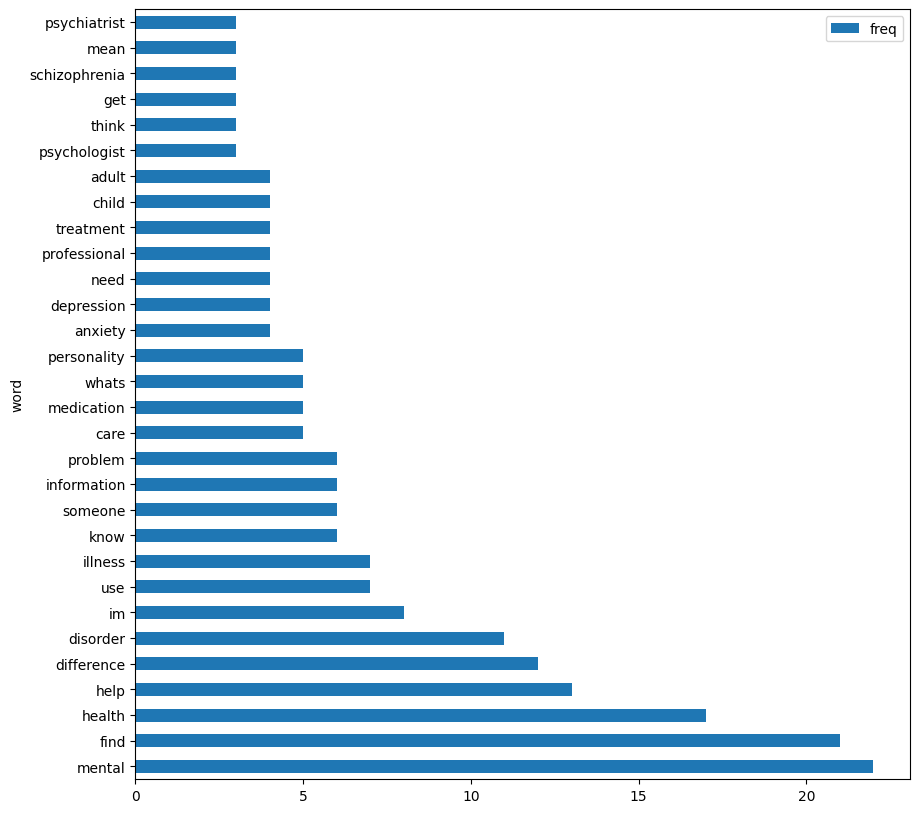

In [76]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)
    
    return dictionary

dictionary_clean = dictionary(faq_quest['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

<Axes: ylabel='word'>

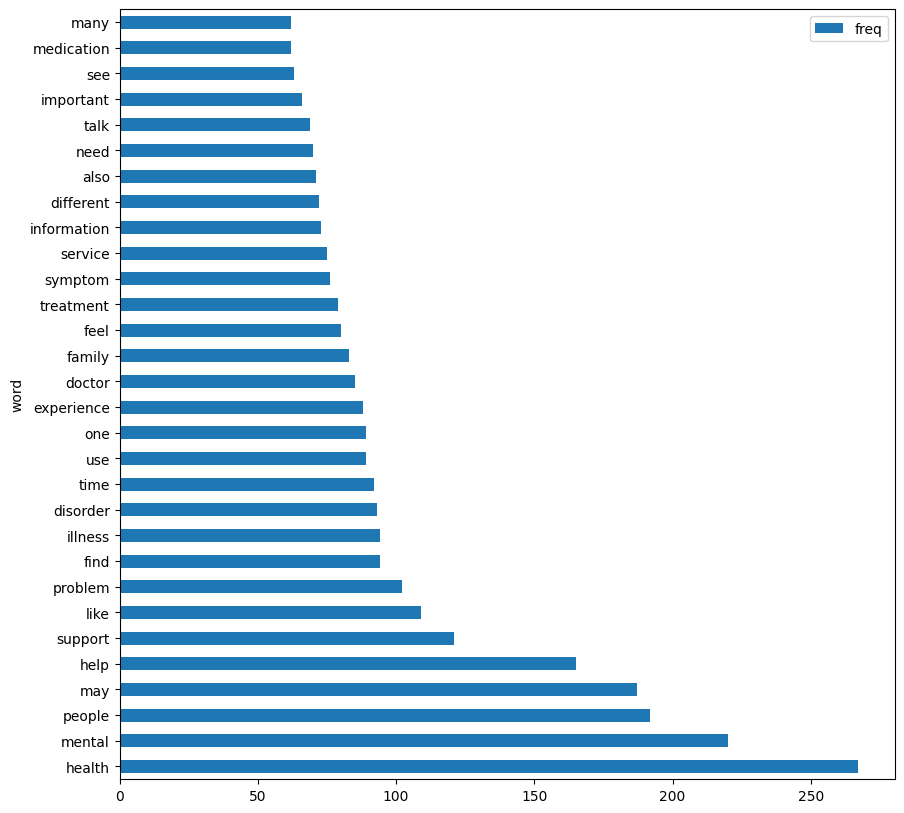

In [77]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)
    
    return dictionary

dictionary_clean = dictionary(faq_answ['lemma'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

## Wordcloud

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize= (20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

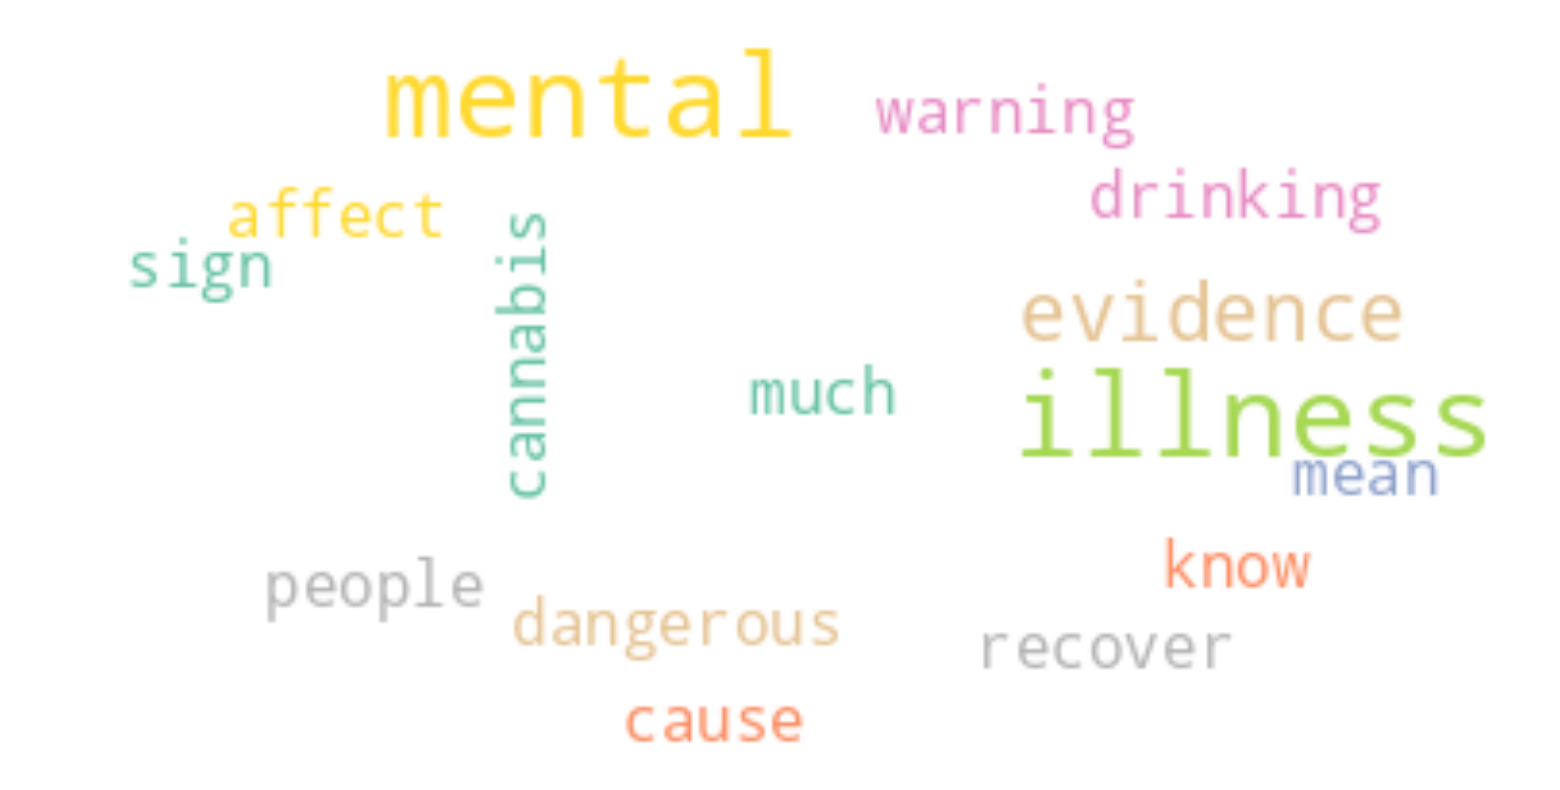

In [79]:
word_cloud= WordCloud(max_font_size=30, max_words=15, background_color="white", colormap ='Set2', collocations = False, stopwords = stopwords.words('english')).generate(str(faq_quest['lemma']))
plot_cloud(word_cloud)

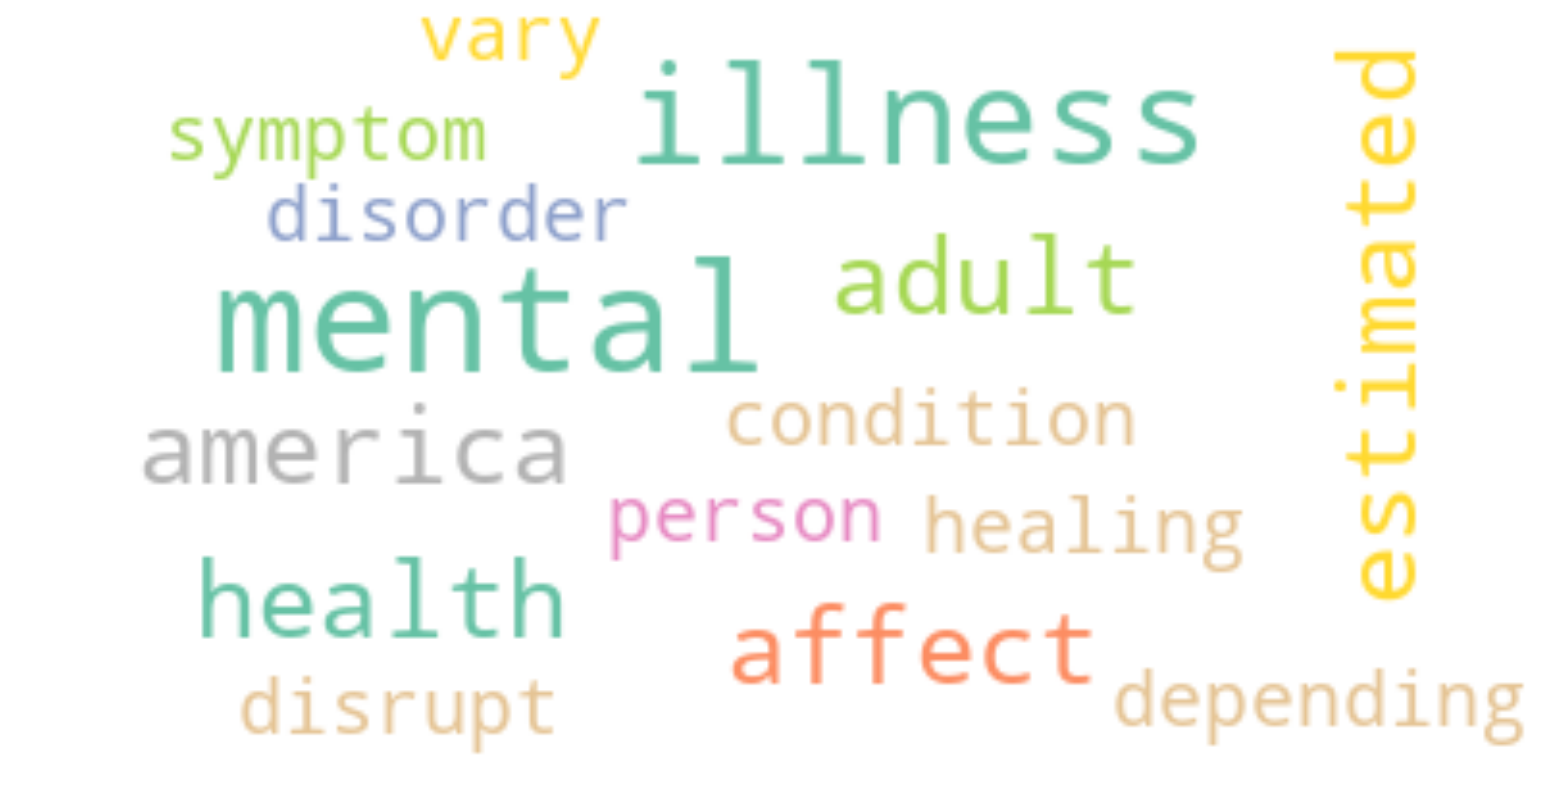

In [80]:
word_cloud= WordCloud(max_font_size=40, max_words=15, background_color="white", colormap='Set2', collocations= False, stopwords= stopwords.words('english')).generate(str(faq_answ['lemma']))
plot_cloud(word_cloud)

## Labelling

In [81]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
faq['AnswersEncode'] = label.fit_transform(faq['Answers'])
faq

,Question_ID,Questions,Answers,AnswersEncode
0,1590140,What does it mean to have a mental illness?,Mental illnesses are health conditions that di...,48
1,2110618,Who does mental illness affect?,It is estimated that mental illness affects 1 ...,35
2,6361820,What causes mental illness?,It is estimated that mental illness affects 1 ...,36
3,9434130,What are some of the warning signs of mental i...,Symptoms of mental health disorders vary depen...,72
4,7657263,Can people with mental illness recover?,"When healing from mental illness, early identi...",91
...,...,...,...,...
93,4373204,How do I know if I'm drinking too much?,Sorting out if you are drinking too much can b...,69
94,7807643,"If cannabis is dangerous, why are we legalizin...","Cannabis smoke, for example, contains cancer-c...",18
95,4352464,How can I convince my kids not to use drugs?,You can't. But you can influence their capacit...,96
96,6521784,What is the legal status (and evidence) of CBD...,Cannabidiol or CBD is a naturally occurring co...,17


## Modeling

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [37]:
text = faq['Questions']
y= faq['AnswersEncode'].values

In [83]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)
print(X_train)

  (0, 256)	0.33699114814760156
  (0, 248)	0.4698727395323585
  (0, 128)	0.43100736553424124
  (0, 189)	0.33699114814760156
  (0, 253)	0.24002535014672377
  (0, 246)	0.40343194383998005
  (0, 127)	0.3820427850599321
  (1, 190)	0.4494309704406547
  (1, 129)	0.4494309704406547
  (1, 9)	0.4494309704406547
  (1, 256)	0.32233038012084314
  (1, 189)	0.32233038012084314
  (1, 253)	0.22958306999074388
  (1, 127)	0.3654220498303909
  (2, 50)	0.532037746039627
  (2, 49)	0.532037746039627
  (2, 256)	0.41598363562423185
  (2, 189)	0.41598363562423185
  (2, 253)	0.29628854747330263
  (3, 360)	0.43479535353853427
  (3, 422)	0.43479535353853427
  (3, 359)	0.43479535353853427
  (3, 421)	0.43479535353853427
  (3, 256)	0.311833764912643
  (3, 189)	0.311833764912643
  :	:
  (93, 209)	0.37956061424233656
  (94, 88)	0.4544791488308225
  (94, 43)	0.4544791488308225
  (94, 218)	0.4544791488308225
  (94, 87)	0.4544791488308225
  (94, 42)	0.41688705078479515
  (95, 417)	0.3906075248419597
  (95, 208)	0.39060752

## Testing

In [85]:
lsvc = LinearSVC(random_state = 2021)
lsvc.fit(X_train, y)

LinearSVC(random_state=2021)

**Test the data using 3 questions that I make my own.**

In [86]:
search_test = [
    "How can I recover?",
    "Is cannabis dangerous?",
    "What is the side effect of drinking?"
]

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)

for question in result:
    faq_data = faq.loc[faq.isin([question]).any(axis=1)]
    print("Answer: ", faq_data['Answers'].values)

Answer:  ['When healing from mental illness, early identification and treatment are of vital importance. Based on the nature of the illness, there are a range of effective treatments available. For any type of treatment, it is essential that the person affected is proactive and fully engaged in their own recovery process.\nMany people with mental illnesses who are diagnosed and treated respond well, although some might experience a return of symptoms. Even in such cases, with careful monitoring and management of the disorder, it is still quite possible to live a fulfilled and productive life.']
Answer:  ['Cannabis smoke, for example, contains cancer-causing toxins. However, the risk of developing some cancers (e.g., mouth, tongue and lung) is less for cannabis smokers than tobacco smokers, partly because they tend to smoke less than tobacco users. And, while all drugs have an effect on the brain, the particular properties of the drug influence the level of risk of harmful consequences.

In [41]:
search_test = [
    "What causes mental illness?",
]

search_engine = tfidf.transform(search_test)
result = lsvc.predict(search_engine)

for question in result:
    faq_data = faq.loc[faq.isin([question]).any(axis=1)]
    print("Answer: ", faq_data['Answers'].values)

Answer:  ['It is estimated that mental illness affects 1 in 5 adults in America, and that 1 in 24 adults have a serious mental illness. Mental illness does not discriminate; it can affect anyone, regardless of gender, age, income, social status, ethnicity, religion, sexual orientation, or background. Although mental illness can affect anyone, certain conditions may be more common in different populations. For instance, eating disorders tend to occur more often in females, while disorders such as attention deficit/hyperactivity disorder is more prevalent in children. Additionally, all ages are susceptible, but the young and the old are especially vulnerable. Mental illnesses usually strike individuals in the prime of their lives, with 75 percent of mental health conditions developing by the age of 24. This makes identification and treatment of mental disorders particularly difficult, because the normal personality and behavioral changes of adolescence may mask symptoms of a mental healt

In [87]:
import os
os.getcwd()

'/content'

In [88]:
%cd /content/drive/MyDrive/Mental Health Chatboat

/content/drive/MyDrive/Mental Health Chatboat


In [89]:
import joblib

filename = 'mental_health.sav'
joblib.dump(lsvc, filename)

['mental_health.sav']

In [90]:
# some time later...

# load the model from disk
loaded_model = joblib.load("/content/drive/MyDrive/Mental Health Chatboat/mental_health.sav")

In [91]:
search_test = [
    "What causes mental illness?",
]

search_engine = tfidf.transform(search_test)
result = loaded_model.predict(search_engine)

for question in result:
    faq_data = faq.loc[faq.isin([question]).any(axis=1)]
    print("Answer: ", faq_data['Answers'].values)

Answer:  ['It is estimated that mental illness affects 1 in 5 adults in America, and that 1 in 24 adults have a serious mental illness. Mental illness does not discriminate; it can affect anyone, regardless of gender, age, income, social status, ethnicity, religion, sexual orientation, or background. Although mental illness can affect anyone, certain conditions may be more common in different populations. For instance, eating disorders tend to occur more often in females, while disorders such as attention deficit/hyperactivity disorder is more prevalent in children. Additionally, all ages are susceptible, but the young and the old are especially vulnerable. Mental illnesses usually strike individuals in the prime of their lives, with 75 percent of mental health conditions developing by the age of 24. This makes identification and treatment of mental disorders particularly difficult, because the normal personality and behavioral changes of adolescence may mask symptoms of a mental healt